# Data Science for Business - Predicting Credit Card Default with KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Set up workspace
np.random.seed(42)
# Turn off scientific notation for large numbers
pd.options.display.float_format = '{:.2f}'.format

## Load Data
Importing the dataset from a CSV file.

In [3]:
df = pd.read_csv('default.csv')

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


Removing unnecessary columns.

In [5]:
df = df.drop('student', axis=1)

## Summary Statistics
Generating summary statistics and cross-tabulation for the `default` variable.

In [6]:
# Summary statistics
print(df.describe())

       balance   income
count 10000.00 10000.00
mean    835.37 33516.98
std     483.71 13336.64
min       0.00   771.97
25%     481.73 21340.46
50%     823.64 34552.64
75%    1166.31 43807.73
max    2654.32 73554.23


In [7]:
# Cross-table for the `default` variable
pd.crosstab(df['default'], columns='default')


col_0,default
default,
No,9667
Yes,333


## Visualizations
Use seaborn to visually explore the dataset.

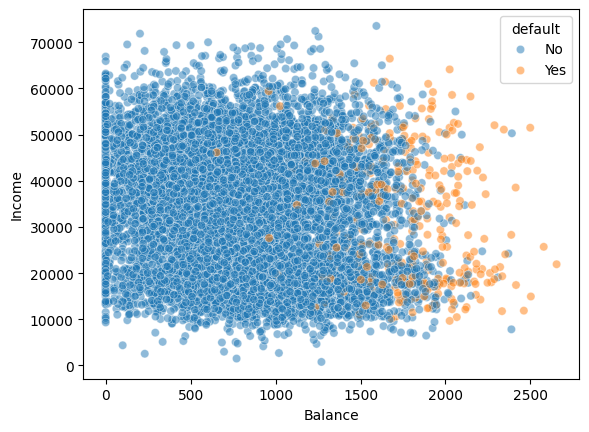

In [8]:
# create a scatterplot with balance and income on the x and y axes and default as hue
sns.scatterplot(x='balance', y='income', hue='default', alpha=0.5, data=df)
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

## Machine Learning - KNN
Training a K-Nearest Neighbors model to predict credit card default.

In [9]:
# Splitting the data into features and outcome
X = df[['balance', 'income']]
y = df['default']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# Show labels
knn.classes_

array(['No', 'Yes'], dtype=object)

In [13]:
# Making predictions
y_prob = knn.predict_proba(X_test)[: , 1]

In [14]:
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

<Axes: ylabel='Count'>

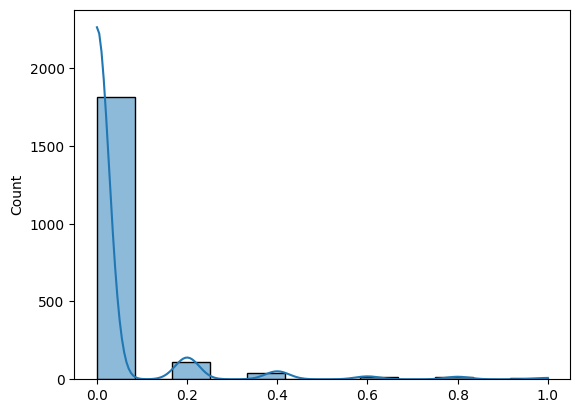

In [15]:
# plot distribution of predicted probabilities for default
sns.histplot(y_prob, kde=True)

In [16]:
# Transform probabilities into binary outcomes
decision_threshold = 0.5
y_pred = np.where(y_prob > decision_threshold, 'Yes', 'No')

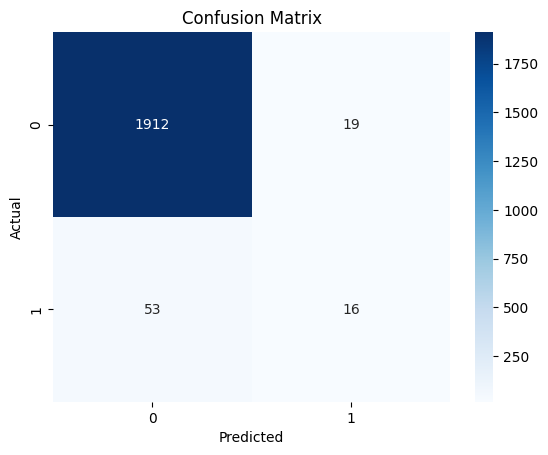

In [17]:
# Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1931
         Yes       0.46      0.23      0.31        69

    accuracy                           0.96      2000
   macro avg       0.72      0.61      0.64      2000
weighted avg       0.96      0.96      0.96      2000



## Your Turn!

Experiment with the above code and:

1.  Change `n_neighbors` and observe how the accuracy of the classifier changes.

2.  Change the `decision threshold` and observe how the accuracy of the classifier changes.